<a href="https://colab.research.google.com/github/ishankarve/meta_analysis/blob/main/met_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# import libraries
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data
met_df = pd.read_csv("https://raw.githubusercontent.com/ishankarve/meta_analysis/main/metadata.csv", na_values=np.nan)

In [4]:
# prevent result truncation
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

In [5]:
# check shape of the dataframe
met_df.shape

(320, 16)

In [6]:
# check sample dataframe
met_df.head(50)

,DATE,TIME,F/L (ft),LCL,CCL,LFC,TTI,KI,LI,SI,BI,HI,DCI,SWEAT,CAPE,TS
0,03/06/2019,1630,"16,145",950,933,885,43.0,24.7,-7.3,1.1,95.8,25.3,44.6,-7.9,-,TS
1,04/06/2019,430,"16,790",972,943,895,38.4,27.9,-6.9,4.5,95.9,20.5,36.3,26.9,-,NaN
2,11/08/2019,1630,"16,585",938,-,-,44.7,28.4,-5.5,-1.0,95.1,20.7,45.1,76.2,-,NaN
3,12/08/2019,530,"16,134",996,970,970,41.8,30.3,-4.0,0.4,93.5,10.4,37.6,157.0,1358.9,NaN
4,14/08/2019,530,"16,401",958,950,947,42.3,29.0,-4.3,0.3,98.5,14.2,41.0,208.8,-,NaN
5,27/08/2019,1630,"17,892",943,938,936,38.5,34.4,-2.5,1.8,92.6,5.4,40.6,-81.5,NaN,NaN
6,28/08/2019,1730,"17,605",952,942,935,37.8,66.4,-2.4,2.6,93.9,12.5,4.6,48.1,1930.6,NaN
7,04/09/2019,530,"16,952",982,920,850,41.1,35.2,-1.5,1.0,90.6,6.2,36.8,122.3,404.5,NaN
8,05/09/2019,630,"16,675",982,940,965,40.7,33.8,-2.1,1.3,95.7,10.6,37.0,-3.7,-,TS
9,06/09/2019,430,"16,496",950,925,965,40.2,34.8,-1.5,1.3,96.0,9.6,39.6,-15.1,-,NaN


In [7]:
# check basic dataframe numeric properties
met_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TIME,320.0,1011.906250,641.207563,330.0,430.00,530.0,1730.000,2330.0
TTI,320.0,39.417500,5.269693,18.8,37.60,40.0,42.325,51.9
KI,320.0,21.083750,14.846174,-30.5,11.00,26.8,32.025,66.4
LI,320.0,-1.414375,3.635610,-10.5,-3.60,-2.0,0.700,14.3
SI,320.0,2.796563,3.385015,-16.7,0.80,2.4,4.400,14.9
BI,318.0,94.564780,6.778698,9.1,93.70,95.3,96.575,103.1
HI,319.0,42.175235,24.546631,0.1,19.10,43.2,61.000,118.0
SWEAT,320.0,-18.380312,165.573275,-714.0,-111.65,1.5,94.875,370.6


In [8]:
# check object type of dataframe
met_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      320 non-null    object 
 1   TIME      320 non-null    int64  
 2   F/L (ft)  320 non-null    object 
 3   LCL       320 non-null    object 
 4   CCL       320 non-null    object 
 5   LFC       317 non-null    object 
 6   TTI       320 non-null    float64
 7   KI        320 non-null    float64
 8   LI        320 non-null    float64
 9   SI        320 non-null    float64
 10  BI        318 non-null    float64
 11  HI        319 non-null    float64
 12  DCI       320 non-null    object 
 13  SWEAT     320 non-null    float64
 14  CAPE      319 non-null    object 
 15  TS        45 non-null     object 
dtypes: float64(7), int64(1), object(8)
memory usage: 40.1+ KB


In [9]:
# get percentage of null values per column
missing_info_df = met_df.isnull().sum() / met_df.shape[0] * 100.00
missing_info_df = pd.DataFrame({'columns':missing_info_df.index, 'percent_missing':missing_info_df.values})
missing_info_df.sort_values(by='percent_missing', ascending=False)

,columns,percent_missing
15,TS,85.9375
5,LFC,0.9375
10,BI,0.6250
11,HI,0.3125
14,CAPE,0.3125
0,DATE,0.0000
1,TIME,0.0000
2,F/L (ft),0.0000
3,LCL,0.0000
4,CCL,0.0000


In [10]:
# extrate date/month/year from date column and append the column to the dataframe
met_df['day'] = pd.to_datetime(met_df['DATE'], format='%d/%m/%Y', errors='ignore').dt.day
met_df['month'] = pd.to_datetime(met_df['DATE'], format='%d/%m/%Y', errors='ignore').dt.month
met_df['year'] = pd.to_datetime(met_df['DATE'], format='%d/%m/%Y', errors='ignore').dt.year

In [11]:
met_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      320 non-null    object 
 1   TIME      320 non-null    int64  
 2   F/L (ft)  320 non-null    object 
 3   LCL       320 non-null    object 
 4   CCL       320 non-null    object 
 5   LFC       317 non-null    object 
 6   TTI       320 non-null    float64
 7   KI        320 non-null    float64
 8   LI        320 non-null    float64
 9   SI        320 non-null    float64
 10  BI        318 non-null    float64
 11  HI        319 non-null    float64
 12  DCI       320 non-null    object 
 13  SWEAT     320 non-null    float64
 14  CAPE      319 non-null    object 
 15  TS        45 non-null     object 
 16  day       320 non-null    int64  
 17  month     320 non-null    int64  
 18  year      320 non-null    int64  
dtypes: float64(7), int64(4), object(8)
memory usage: 47.6+ KB


In [12]:
# replace "-" in dataframe with NaN across dataframe
met_df = met_df.applymap(lambda x: np.nan if x == '-' else x)

In [13]:
#impute comma from ft and convert to decimal
met_df['F/L (ft)'] = met_df['F/L (ft)'].astype(str).apply(lambda x: x.replace(",", "" ))
met_df['LCL'] = met_df['LCL'].astype(str).apply(lambda x: x.replace(",", "" ))

In [14]:
# impute TS column with 1 for all row having value TS and 0 otherwise and convert it to int
met_df['TS'] = met_df['TS'].astype(str).replace("TS",1)
met_df['TS'] = met_df['TS'].astype(str).apply(lambda x: 0 if x == "nan" else x)
met_df['TS'] = met_df['TS'].astype(str).astype(int)

In [15]:
met_df['TS'] = met_df['TS'].astype(str).astype(int)

In [16]:
met_df['DCI'] = met_df['DCI'].astype(str).apply(lambda x: x.replace("..", "." ))
met_df['DCI'] = met_df['DCI'].astype(str).astype(float)

In [17]:
met_df['LFC'] = met_df['LFC'].apply(lambda x: "" if x == "nan" else x)

In [18]:
met_df['CCL'] = met_df['CCL'].astype(str).astype(float)
met_df['LFC'] = met_df['LFC'].astype(str).astype(float)
met_df['LCL'] = met_df['LCL'].astype(str).astype(float)
met_df['CAPE'] = met_df['CAPE'].astype(str).astype(float)
met_df['F/L (ft)'] = met_df['F/L (ft)'].astype(str).astype(float)


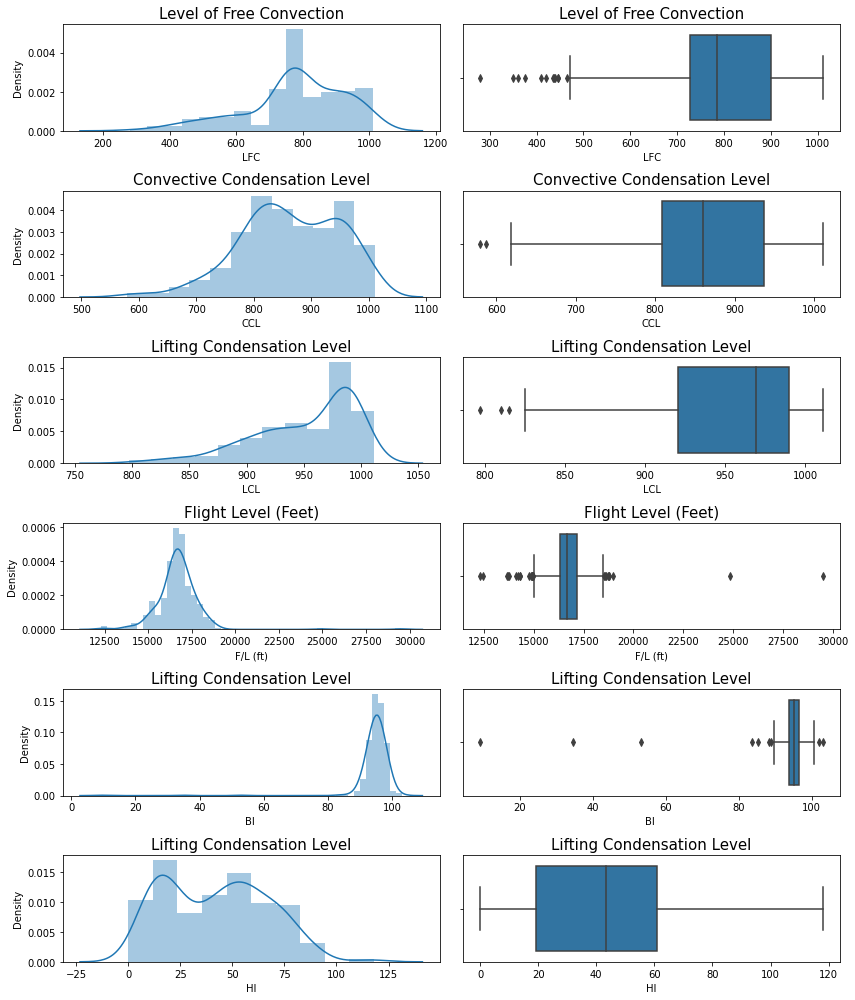

In [19]:
# before we impute values of missing rows across columns, we need to undertake univariate analysis

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(met_df['LFC'] , ax=axes[0][0])
a.set_title("Level of Free Convection",fontsize=15)

a = sns.boxplot(met_df['LFC'] , orient = "v" , ax=axes[0][1])
a.set_title("Level of Free Convection",fontsize=15)


a = sns.distplot(met_df['CCL'] , ax=axes[1][0])
a.set_title("Convective Condensation Level",fontsize=15)

a = sns.boxplot(met_df['CCL'] , orient = "v" , ax=axes[1][1])
a.set_title("Convective Condensation Level",fontsize=15)


a = sns.distplot(met_df['LCL'] , ax=axes[2][0])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.boxplot(met_df['LCL'] , orient = "v" , ax=axes[2][1])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.distplot(met_df['F/L (ft)'] , ax=axes[3][0])
a.set_title("Flight Level (Feet)",fontsize=15)

a = sns.boxplot(met_df['F/L (ft)'] , orient = "v" , ax=axes[3][1])
a.set_title("Flight Level (Feet)",fontsize=15)

a = sns.distplot(met_df['BI '] , ax=axes[4][0])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.boxplot(met_df['BI '] , orient = "v" , ax=axes[4][1])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.distplot(met_df['HI'] , ax=axes[5][0])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.boxplot(met_df['HI'] , orient = "v" , ax=axes[5][1])
a.set_title("Lifting Condensation Level",fontsize=15)

plt.tight_layout()

In [20]:
# since there are very few outliers we shal impute the missing values with median values

In [21]:
met_df['CCL'].fillna(met_df['CCL'].median(), inplace=True)
met_df['LCL'].fillna(met_df['LCL'].median(), inplace=True)
met_df['LFC'].fillna(met_df['LFC'].mean(), inplace=True)
met_df['F/L (ft)'].fillna(met_df['F/L (ft)'].mean(), inplace=True)
met_df['BI '].fillna(met_df['BI '].median(), inplace=True)
met_df['HI'].fillna(met_df['HI'].mean(), inplace=True)


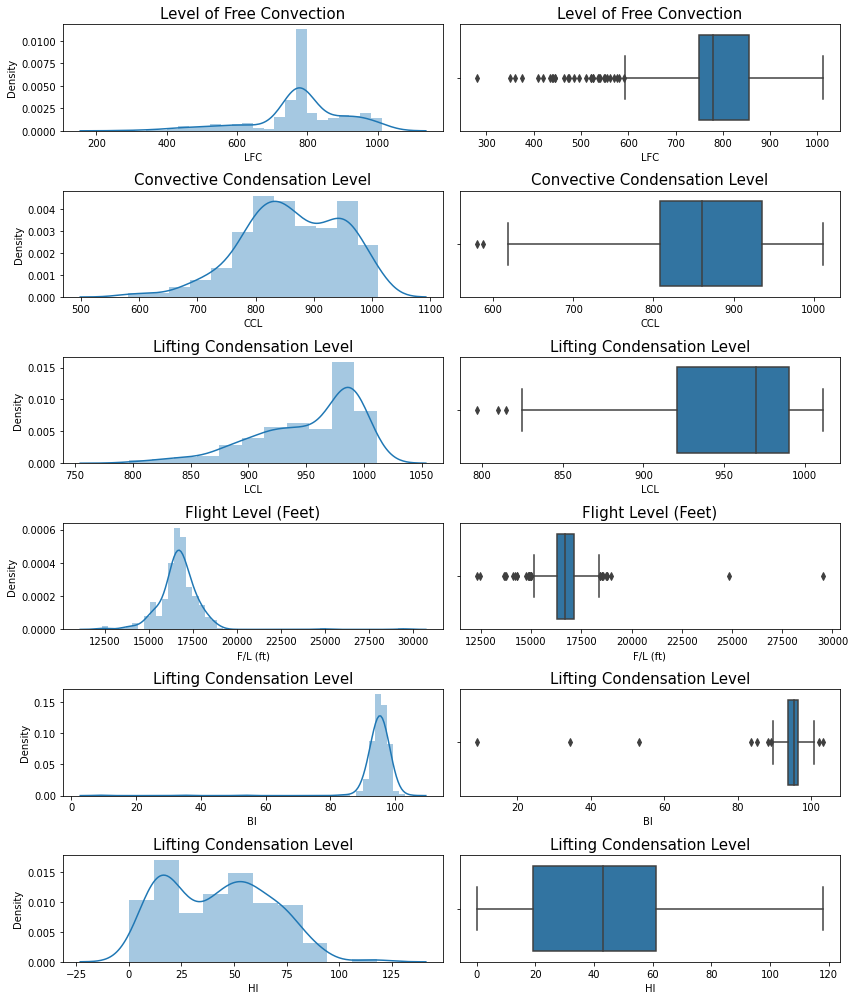

In [22]:
# check distributon of values again

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 14)


a = sns.distplot(met_df['LFC'] , ax=axes[0][0])
a.set_title("Level of Free Convection",fontsize=15)

a = sns.boxplot(met_df['LFC'] , orient = "v" , ax=axes[0][1])
a.set_title("Level of Free Convection",fontsize=15)


a = sns.distplot(met_df['CCL'] , ax=axes[1][0])
a.set_title("Convective Condensation Level",fontsize=15)

a = sns.boxplot(met_df['CCL'] , orient = "v" , ax=axes[1][1])
a.set_title("Convective Condensation Level",fontsize=15)


a = sns.distplot(met_df['LCL'] , ax=axes[2][0])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.boxplot(met_df['LCL'] , orient = "v" , ax=axes[2][1])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.distplot(met_df['F/L (ft)'] , ax=axes[3][0])
a.set_title("Flight Level (Feet)",fontsize=15)

a = sns.boxplot(met_df['F/L (ft)'] , orient = "v" , ax=axes[3][1])
a.set_title("Flight Level (Feet)",fontsize=15)

a = sns.distplot(met_df['BI '] , ax=axes[4][0])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.boxplot(met_df['BI '] , orient = "v" , ax=axes[4][1])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.distplot(met_df['HI'] , ax=axes[5][0])
a.set_title("Lifting Condensation Level",fontsize=15)

a = sns.boxplot(met_df['HI'] , orient = "v" , ax=axes[5][1])
a.set_title("Lifting Condensation Level",fontsize=15)

plt.tight_layout()

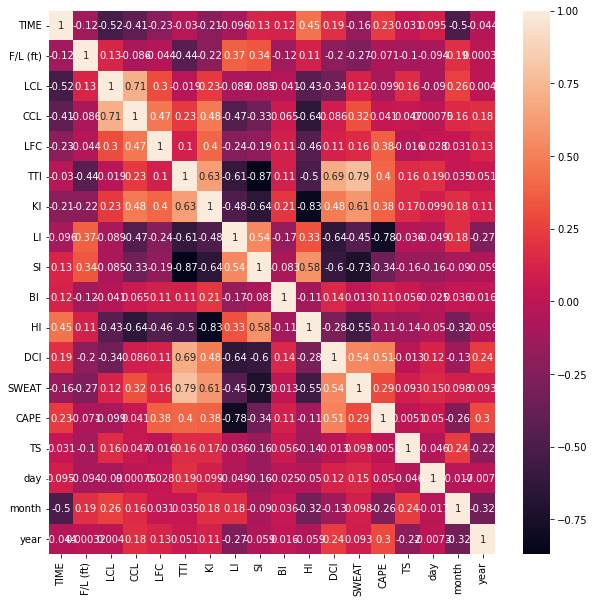

In [23]:
# Visualising correlation matrix 
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(met_df.corr(),annot = True)
plt.show()

**Prepare Data for Regression**

In [24]:
#drop not required columns
met_df.drop(columns=['DATE', 'CAPE', 'year','day','TIME'], inplace=True)


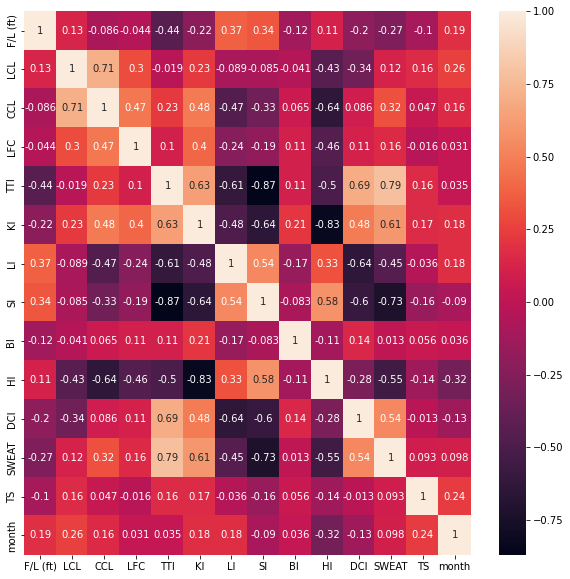

In [25]:
# Visualising correlation matrix post dropping of tables
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(met_df.corr(),annot = True)
plt.show()

<Figure size 1080x1296 with 0 Axes>

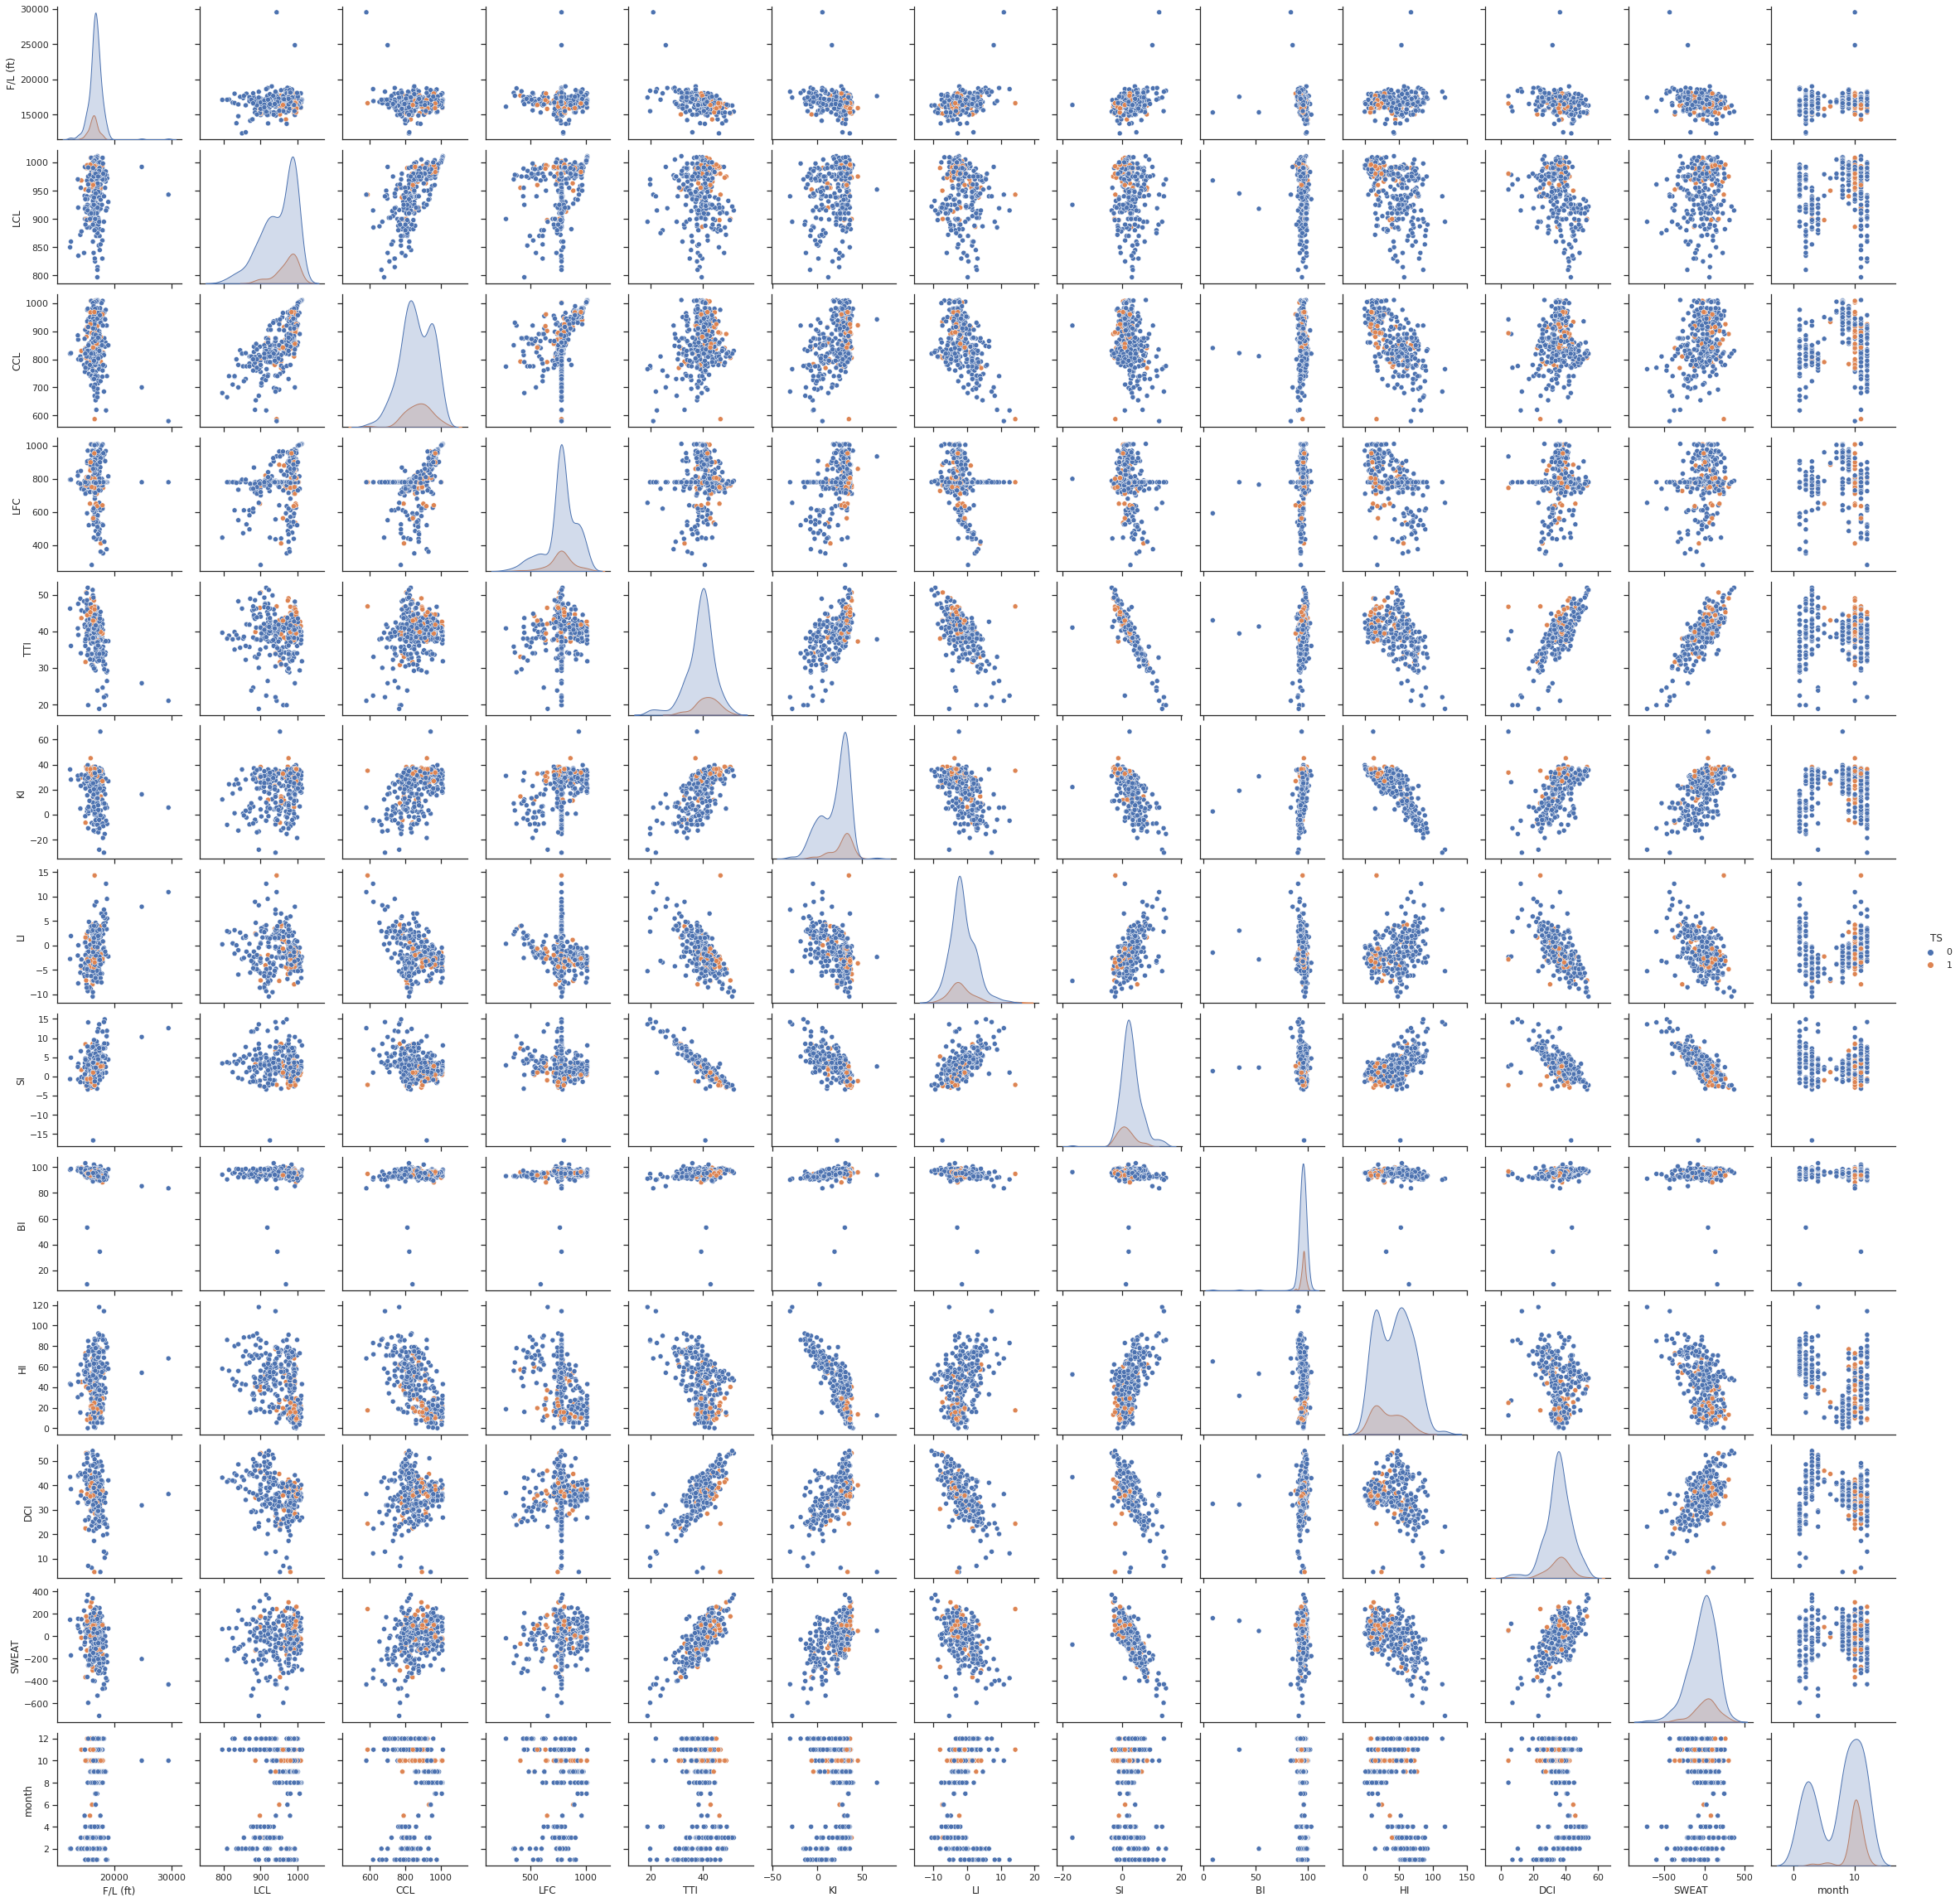

In [63]:
# Visualise the scatter matrix
plt.figure(figsize=(15,18))
sns.set(style="ticks")
sns.pairplot(met_df, hue = "TS")
plt.show()

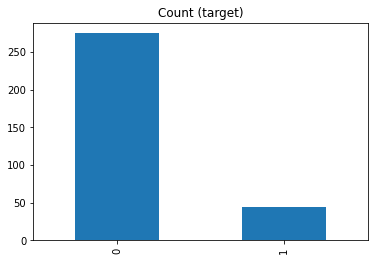

In [26]:
# checking class imbalance in the targer column
met_df['TS'].value_counts().plot(kind='bar', title='Count (target)');

**Using SMOTE to rectify class imbalance in TS**

In [27]:
# splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(met_df, train_size = 0.7, test_size = 0.3, random_state = 100)

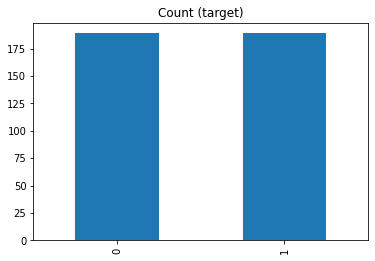

In [28]:
from imblearn.over_sampling import SMOTE

labels = ['F/L (ft)', 'LCL', 'CCL', 'LFC', 'TTI', 'KI', 'LI', 'SI', 'BI ', 'HI', 'DCI', 'SWEAT', 'month']

smote = SMOTE(random_state=42, sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(df_train[labels], df_train['TS'])

df = pd.DataFrame(X_sm, columns=labels)
df['target'] = y_sm

df['target'].value_counts().plot(kind='bar', title='Count (target)');

In [29]:
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except target TS column as it is binary
num_vars = ['F/L (ft)', 'LCL', 'CCL', 'LFC', 'TTI', 'KI', 'LI', 'SI', 'BI ', 'HI', 'DCI', 'SWEAT', 'month']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_test[num_vars] = scaler.fit(df_test[num_vars])

In [32]:
df_train.head(10)

,F/L (ft),LCL,CCL,LFC,TTI,KI,LI,SI,BI,HI,DCI,SWEAT,TS,month
306,0.244750,0.855140,0.763341,0.793434,0.576324,0.656347,0.411290,0.498382,0.907447,0.361702,0.585020,0.591177,0,1.000000
218,0.251437,0.990654,0.995360,0.997264,0.591900,0.664603,0.153226,0.631068,0.932979,0.085106,0.718623,0.784379,0,0.636364
194,0.161621,0.471963,0.533643,0.670315,0.953271,0.691434,0.072581,0.462783,0.943617,0.410461,0.973684,0.941730,0,0.181818
61,0.247917,0.574766,0.382831,0.683335,0.704050,0.390093,0.483871,0.627832,0.905319,0.432624,0.601215,0.771877,0,0.909091
71,0.241758,0.808411,0.684455,0.485636,0.529595,0.522188,0.370968,0.695793,0.884043,0.361702,0.548583,0.630334,0,1.000000
139,0.237358,0.705607,0.626450,0.649795,0.685358,0.654283,0.399194,0.618123,0.945745,0.171986,0.651822,0.750077,0,0.909091
272,0.236771,0.925234,0.812065,0.827633,0.654206,0.690402,0.403226,0.559871,0.919149,0.000000,0.631579,0.636223,0,0.727273
294,0.267863,0.897196,0.784223,0.485636,0.554517,0.631579,0.395161,0.650485,0.886170,0.154255,0.572874,0.492923,1,0.909091
85,0.233251,0.897196,0.672854,0.335157,0.778816,0.404541,0.362903,0.563107,0.884043,0.476950,0.534413,0.594896,0,0.000000
31,0.171653,0.901869,0.730858,0.704514,0.816199,0.679051,0.258065,0.501618,0.931915,0.109043,0.692308,0.744705,0,0.818182


In [33]:
# extracting target column from main dataframe
y_train = df_train.pop('TS')
X_train = df_train

In [34]:
y_test = df_test.pop('TS')
X_test = df_test

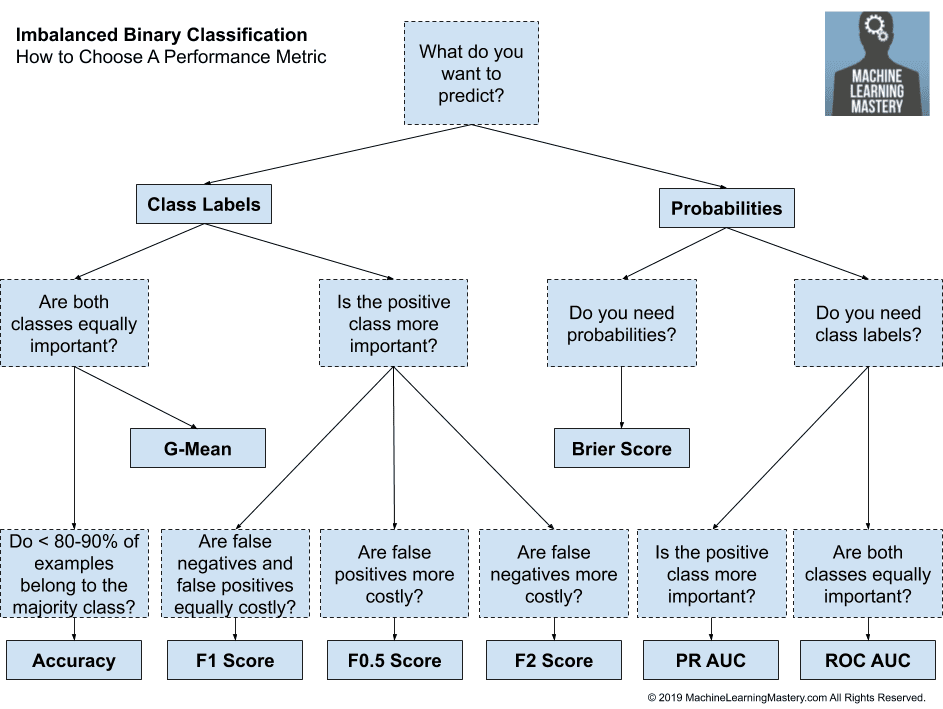

In [35]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


Mean ROC AUC: 0.679


In [37]:
# ROC AUC metric
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.657


In [36]:
#check accuracy
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean accuracy: %.3f' % mean(scores))

Mean accuracy: 0.832


In [38]:
#check F1 score
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
print('Mean F1 score: %.3f' % mean(scores))

Mean F1 score: 0.428


**Random Forest Estimator**

In [42]:
# splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(met_df, train_size = 0.7, test_size = 0.3, random_state = 100)

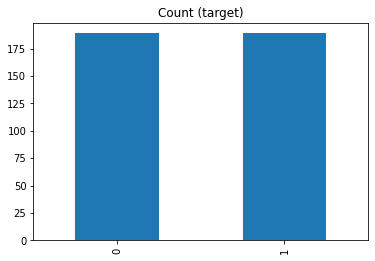

In [43]:
from imblearn.over_sampling import SMOTE

labels = ['F/L (ft)', 'LCL', 'CCL', 'LFC', 'TTI', 'KI', 'LI', 'SI', 'BI ', 'HI', 'DCI', 'SWEAT', 'month']

smote = SMOTE(random_state=42, sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(df_train[labels], df_train['TS'])

df = pd.DataFrame(X_sm, columns=labels)
df['target'] = y_sm

df['target'].value_counts().plot(kind='bar', title='Count (target)');

In [44]:
# extracting target column from main dataframe
y_train = df_train.pop('TS')
X_train = df_train

In [45]:
y_test = df_test.pop('TS')
X_test = df_test

In [46]:
# creating a RF classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 

In [47]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9166666666666666


In [48]:
# using the feature importance variable
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index = labels).sort_values(ascending = False)
feature_imp

month       0.133016
KI          0.106550
F/L (ft)    0.098465
LI          0.082056
LCL         0.075696
SWEAT       0.071448
HI          0.065627
TTI         0.065375
CCL         0.063345
DCI         0.060719
SI          0.059751
LFC         0.059149
BI          0.058803
dtype: float64

**Decision Tree Classification**

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[79  7]
 [ 4  6]]


In [67]:
classification_report,
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        86
           1       0.46      0.60      0.52        10

    accuracy                           0.89        96
   macro avg       0.71      0.76      0.73        96
weighted avg       0.90      0.89      0.89        96



In [64]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8854


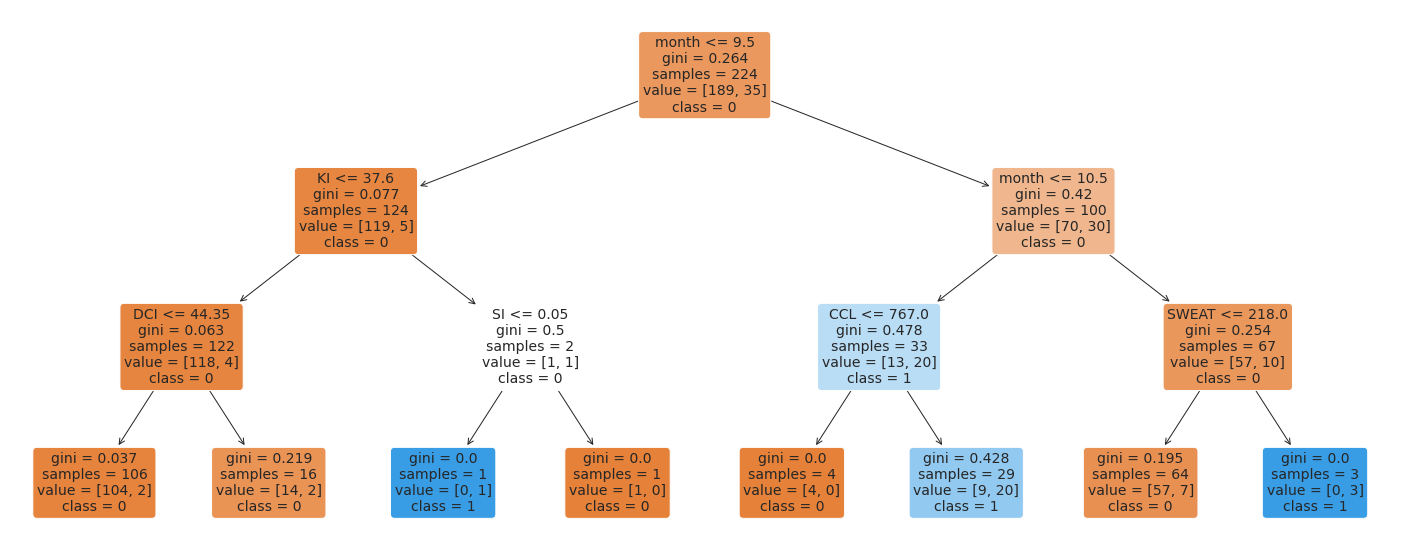

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
tree.plot_tree(clf_en.fit(X_train, y_train), feature_names=labels, class_names=['0','1'],
               filled=True,
               rounded=True,
               fontsize=14)
plt.savefig('decision_tree.png')

In [62]:
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_gini = clf_en.predict(X_test)
print('Model accuracy score with gini criteria: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Model accuracy score with gini criteria: 0.8646
Confusion matrix

 [[77  9]
 [ 4  6]]


In [ ]:
clf_en

In [62]:
feature_imp = pd.Series(clf.feature_importances_, index = labels).sort_values(ascending = False)
feature_imp

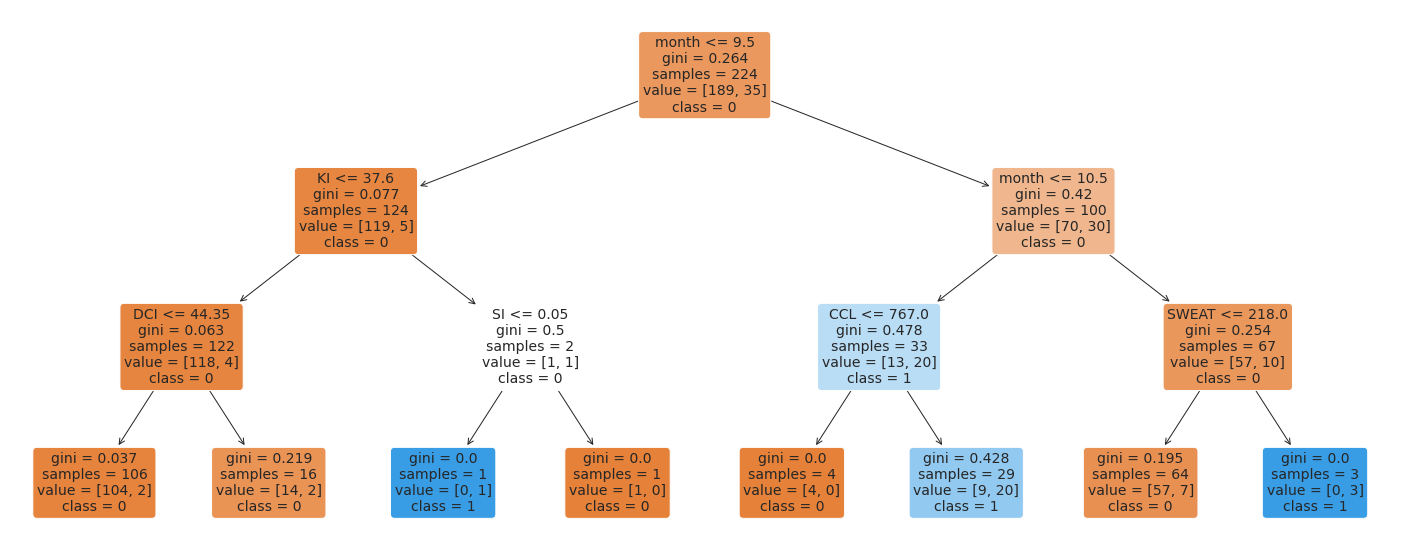

In [70]:
plt.figure(figsize=(25,10))
tree.plot_tree(clf_en.fit(X_train, y_train), feature_names=labels, class_names=['0','1'],
               filled=True,
               rounded=True,
               fontsize=14)
plt.savefig('decision_tree_gini_index.png')